### Download dataset

- https://www.ucl.ac.uk/drc/research/research-methods/minimal-interval-resonance-imaging-alzheimers-disease-miriad
- move MIRIAD.tgz to `<repository_root>/data` (create the folder if it does not exist) and extract it using `tar zxvf backups.tgz` 

### Load test file

In [8]:
import nibabel as nib
import matplotlib.pyplot as plt

file_path = "data/miriad/miriad_188_AD_M/miriad_188_AD_M_01_MR_1/miriad_188_AD_M_01_MR_1.nii"
mri = nib.load(file_path)
print(type(mri))

<class 'nibabel.nifti1.Nifti1Image'>


In [9]:
print(mri.shape)

(256, 256, 124)


In [10]:
print(mri.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 124   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.      0.9375  0.9375  1.5     0.0143  1.      1.      1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.70710677
quatern_d       : 0.70710677
qoffset_x       : 120.0
qoffset_y       : 89.2
qoffset_z       : -1

In [33]:
mri_data = mri.get_fdata()
print(type(mri_data))  # it's a numpy array!
print(mri_data.shape)

<class 'numpy.memmap'>
(256, 256, 124)


In [34]:
mri_data_slice = mri_data[:, :, 64]
print(mri_data_slice.shape)

(256, 256)


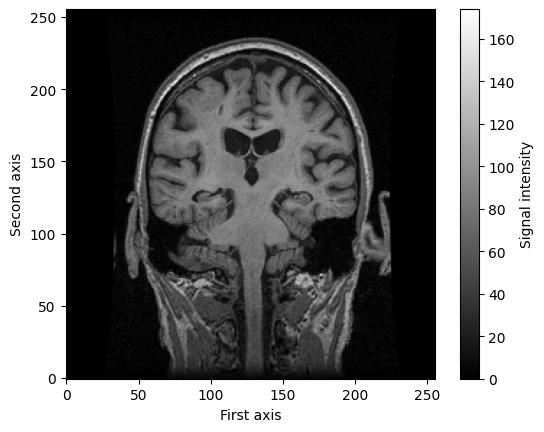

In [35]:
plt.imshow(mri_data_slice.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

### Pytorch Dataset

In [37]:
from miriad import MiriadDataset

miriad_dataset = MiriadDataset(root="data/miriad")

In [38]:
len(miriad_dataset)

708

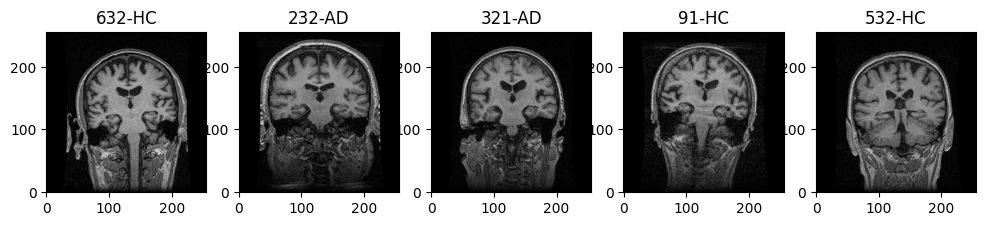

In [68]:
import random

plt.figure(figsize=(12, 6))

labels = ["AD", "HC"]

indices = random.sample(range(0, len(miriad_dataset)), 5)
for i, sample_index in enumerate(indices):
    sample_data, sample_label = miriad_dataset[sample_index]  # Get the i-th sample and its label
    mri_sample_slice = sample_data[:, :, 64]

    plt.subplot(1, 5, i+1)  # Create a subplot for each sample
    plt.imshow(mri_sample_slice.T, cmap='gray', origin='lower')
    plt.title(f"{sample_index}-{labels[sample_label]}")  # Display the label as the title

plt.show()